### 李愷諺 v.s. 高國豪 （例行賽）

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_theme(style="darkgrid", font_scale = 1.3, rc={'font.sans-serif':['Arial Unicode MS','Arial']})

season = '2021-22'
game_type = 'regular-season'
target_player = ['李愷諺','高國豪']
color_for_player = {'李愷諺':'gold','高國豪':'blueviolet'}


In [217]:
from PStatsScraper.GameStatisticTable import GameStatisticTable
from PStatsScraper.SeasonGameList import SeasonGameList


# get all regular season game
season_game_list = SeasonGameList(season)
regular_season_table = season_game_list.get_game_list(game_type)

# get game list that they battle
kings_lioneers_game_list = list(regular_season_table[
                            ((regular_season_table['away_team']=='國王') & (regular_season_table['home_team']=='攻城獅'))
                            | ((regular_season_table['away_team']=='攻城獅') & (regular_season_table['home_team']=='國王')) ]['game'])

# get all game stat of these two player
kyle_table = pd.DataFrame()
kao_table = pd.DataFrame()
for game_numebr in kings_lioneers_game_list:
    game_statistic_table = GameStatisticTable(season=season,game_type=game_type,game_number=game_numebr,english_col=True)
    for team_side in ['home','away']:
        table = game_statistic_table.get_table(team_side=team_side)
        if '高國豪' in list(table['player']):
            target = table[table['player'].isin(target_player)]
            target['team_side'] = team_side
            target['game_number'] = game_numebr
            kao_table = pd.concat([kao_table, target])
        elif '李愷諺' in list(table['player']) :
            target = table[table['player'].isin(target_player)]
            target['team_side'] = team_side
            target['game_number'] = game_numebr
            kyle_table = pd.concat([kyle_table, target])

# convert data type 
def split_shots_2_attamp_and_made(shots):
    attamp, made = shots.split('-')
    return pd.Series([int(attamp), int(made)])
kyle_table['2PM'], kyle_table['2PA'] = kyle_table['2P'].apply(split_shots_2_attamp_and_made)[0], kyle_table['2P'].apply(split_shots_2_attamp_and_made)[1]
kyle_table['3PM'], kyle_table['3PA'] = kyle_table['3P'].apply(split_shots_2_attamp_and_made)[0], kyle_table['3P'].apply(split_shots_2_attamp_and_made)[1]
kyle_table['FTM'], kyle_table['FTA'] = kyle_table['FT'].apply(split_shots_2_attamp_and_made)[0], kyle_table['FT'].apply(split_shots_2_attamp_and_made)[1]

kao_table['2PM'], kao_table['2PA'] = kao_table['2P'].apply(split_shots_2_attamp_and_made)[0], kao_table['2P'].apply(split_shots_2_attamp_and_made)[1]
kao_table['3PM'], kao_table['3PA'] = kao_table['3P'].apply(split_shots_2_attamp_and_made)[0], kao_table['3P'].apply(split_shots_2_attamp_and_made)[1]
kao_table['FTM'], kao_table['FTA'] = kao_table['FT'].apply(split_shots_2_attamp_and_made)[0], kao_table['FT'].apply(split_shots_2_attamp_and_made)[1]

for col in ['points','REB','AST','STL','TO','PF','+/-']:
    kyle_table[col] = kyle_table[col].astype('float')
    kao_table[col] = kao_table[col].astype('float')

def parse_time(time):
    min, sec = time.split(':')
    min, sec =  int(min), int(sec) 
    if sec > 30:
        min = min + 1
    return min
kyle_table['mins'] = kyle_table['mins'].apply(parse_time)
kao_table['mins'] = kao_table['mins'].apply(parse_time)

def points_mins_ratio(row):
    return round(row['points'] / row['mins'],4)
def ast_mins_tario(row):
    return round(row['AST'] / row['mins'],4)
kyle_table['points_mins_ratio'] = kyle_table.apply(points_mins_ratio, axis=1)
kyle_table['ast_mins_ratio'] = kyle_table.apply(ast_mins_tario, axis=1)
kao_table['points_mins_ratio'] = kao_table.apply(points_mins_ratio, axis=1)
kao_table['ast_mins_ratio'] = kao_table.apply(ast_mins_tario, axis=1)

conbined_table = pd.concat([kyle_table, kao_table])
conbined_table.head(3)

/Users/whchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,jersey,starter,player,mins,2P,2P%,3P,3P%,FT,FT%,...,team_side,game_number,2PM,2PA,3PM,3PA,FTM,FTA,points_mins_ratio,ast_mins_ratio
0,9,〇,李愷諺,26,3-6,50%,1-3,33.3%,2-4,50%,...,away,G15,3,6,1,3,2,4,0.4231,0.0385
0,9,〇,李愷諺,35,5-6,83.3%,2-5,40%,4-4,100%,...,away,G35,5,6,2,5,4,4,0.5714,0.1429
0,9,〇,李愷諺,34,0-6,0%,1-2,50%,1-2,50%,...,away,G49,0,6,1,2,1,2,0.1176,0.1765


Text(0.5, 1.0, '助攻 v.s. 上場時間')

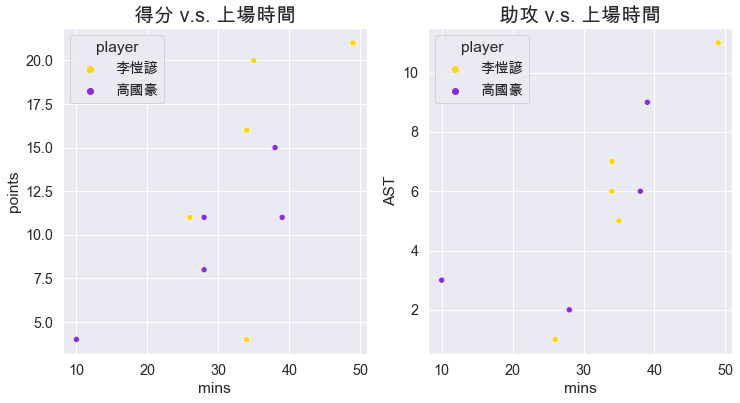

In [218]:
fig, ax = plt.subplots(1, 2,figsize=(12,6))
sns.scatterplot(data=conbined_table, x='mins', y='points', hue='player', ax=ax[0],
            palette=color_for_player)
ax[0].set_title('得分 v.s. 上場時間',fontdict={"fontsize":20})

sns.scatterplot(data=conbined_table, x='mins', y='AST', hue='player', ax=ax[1],
            palette=color_for_player)
ax[1].set_title('助攻 v.s. 上場時間',fontdict={"fontsize":20})


Text(0.5, 1.0, '助攻/上場時間')

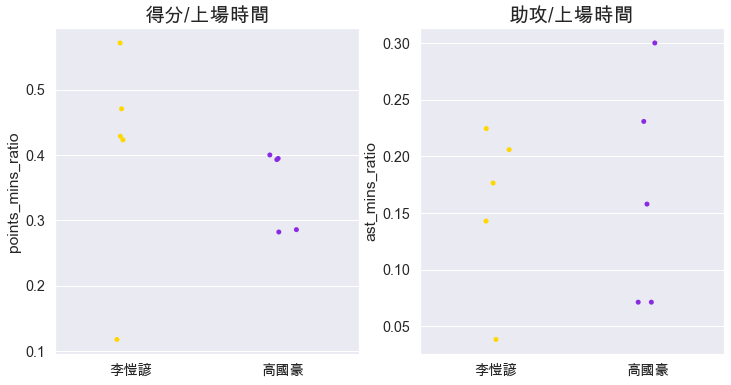

In [219]:


fig, ax = plt.subplots(1, 2,figsize=(12,6))
sns.stripplot(data=conbined_table, x="player", y="points_mins_ratio", ax=ax[0],
            palette=color_for_player)
ax[0].set_xlabel('')            
ax[0].set_title('得分/上場時間',fontdict={"fontsize":20})

sns.stripplot(data=conbined_table, x="player", y="ast_mins_ratio", ax=ax[1],
            palette=color_for_player)
ax[1].set_xlabel('')  
ax[1].set_title('助攻/上場時間',fontdict={"fontsize":20})


In [247]:
# generate average table

col_for_plot = ['player','stat_type','value']
average_stat = pd.DataFrame([], columns = col_for_plot)

for stat_type in ['points','REB','AST','STL','TO','PF','+/-','mins','points_mins_ratio', 'ast_mins_ratio']:
    average_stat = pd.concat([average_stat, pd.DataFrame([['李愷諺',stat_type, kyle_table[stat_type].mean()]], columns = col_for_plot)] )
    average_stat = pd.concat([average_stat, pd.DataFrame([['高國豪',stat_type, kao_table[stat_type].mean()]], columns = col_for_plot)] )

for stat_type in ['2P','3P','FT']:
    value = round( (kyle_table[f'{stat_type}M'].sum() / kyle_table[f'{stat_type}A'].sum()) ,2)
    average_stat = pd.concat([average_stat, pd.DataFrame([['李愷諺', f'{stat_type}%', value]], columns = col_for_plot)] )
    value = round( (kao_table[f'{stat_type}M'].sum() / kao_table[f'{stat_type}A'].sum()) ,2)
    average_stat = pd.concat([average_stat, pd.DataFrame([['高國豪', f'{stat_type}%', value]], columns = col_for_plot)] )

average_stat.head(3)

,player,stat_type,value
0,李愷諺,points,14.4
0,高國豪,points,9.8
0,李愷諺,REB,5.2


Text(0, 0.5, '')

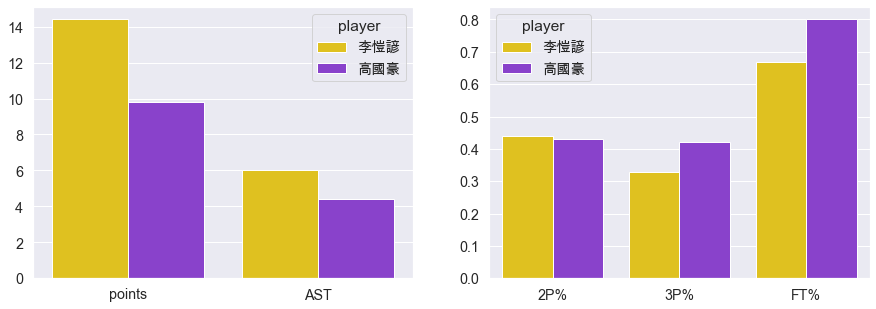

In [222]:

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.barplot(data=average_stat[average_stat['stat_type'].isin(['points','AST'])], x='stat_type', y='value',hue='player',ax=ax[0],
            palette=color_for_player)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data=average_stat[average_stat['stat_type'].isin(['2P%','3P%','FT%'])], x='stat_type', y='value',hue='player',ax=ax[1],
            palette=color_for_player)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

Text(0, 0.5, '')

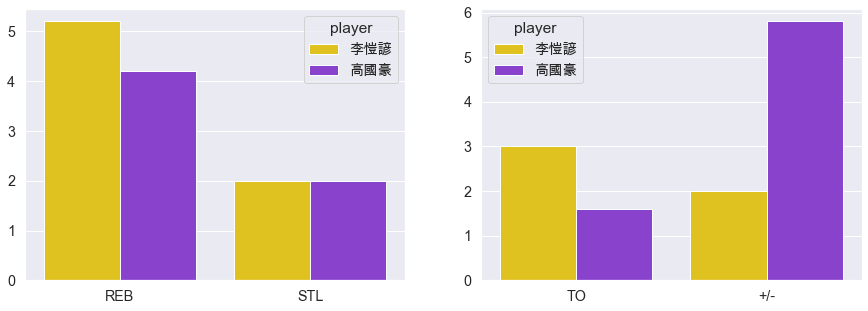

In [223]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.barplot(data=average_stat[average_stat['stat_type'].isin(['REB','STL'])], x='stat_type', y='value',hue='player',ax=ax[0],
            palette=color_for_player)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data=average_stat[average_stat['stat_type'].isin(['TO','+/-'])], x='stat_type', y='value',hue='player',ax=ax[1],
            palette=color_for_player)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

### 對位到高國豪時李愷諺的數據變化

In [236]:
status_color = {'對位高國豪時':'gold', '例行賽平均':'#ffeca9'}

In [232]:
from PStatsScraper.PlayerStatisticTable import PlayerStatisticTable
player_ststistic_table = PlayerStatisticTable(english_col=True)
kings_table = player_ststistic_table.get_table(season='2021-22',game_type='例行賽',team='新北國王',stat_type='平均')
kyle_regular_season_stat = kings_table[kings_table['player'] == '李愷諺']
kyle_regular_season_stat

season :  ['2020-21', '2021-22']
game_type :  ['例行賽', '季後賽', '總冠軍賽']
team :  ['全部球隊', '臺北富邦勇士', '新北國王', '桃園領航猿', '新竹街口攻城獅', '福爾摩沙台新夢想家', '高雄鋼鐵人']
stat_type :  ['平均', '累計']


,player,jersey,team,games,mins,2PM,2PA,2P%,3PM,3PA,...,FT%,points,REB_O,REB_D,REB,AST,STL,BLK,TO,PF
4,李愷諺,9,新北國王,27,32:15,3.33,7.07,47.12%,1.19,3.85,...,71.28%,12.7,1.3,4.48,5.78,5.96,2.19,0.33,2.7,1.67


In [233]:
# convert types
def parse_avg_time(time):
    min, sec = time.split(':')
    min, sec =  int(min), int(sec)
    return min +  round(sec/60,2)
    
kyle_regular_season_stat['mins'] = kyle_regular_season_stat['mins'].apply(parse_time)

for stat in ['mins','2PM','2PA','3PM','3PA','FTM','FTA','points','REB_O','REB_D','REB','AST','STL','BLK','TO','PF']:
    kyle_regular_season_stat[stat] = kyle_regular_season_stat[stat].astype('float')

def parse_percent(percent:str):
    return round(float(percent[:-1])/100,2)
for stat in ['2P%','3P%','FT%']:
    kyle_regular_season_stat[stat] = kyle_regular_season_stat[stat].apply(parse_percent)

kyle_regular_season_stat['points_mins_ratio'] = kyle_regular_season_stat.apply(points_mins_ratio, axis = 1)
kyle_regular_season_stat['ast_mins_ratio'] = kyle_regular_season_stat.apply(ast_mins_tario, axis = 1)
kyle_regular_season_stat = kyle_regular_season_stat.iloc[0]

/Users/whchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [234]:
kyle_when_vs_kao = average_stat[average_stat['player']=='李愷諺'][['stat_type','value']]
kyle_when_vs_kao['status'] = '對位高國豪時'

for stat_type in ['points','REB','AST','STL','TO','PF','mins','2P%','3P%','FT%','points_mins_ratio','ast_mins_ratio']:
    kyle_when_vs_kao = pd.concat([kyle_when_vs_kao, pd.DataFrame([[stat_type, kyle_regular_season_stat[stat_type], '例行賽平均']], columns = kyle_when_vs_kao.columns)] )

Text(0, 0.5, '')

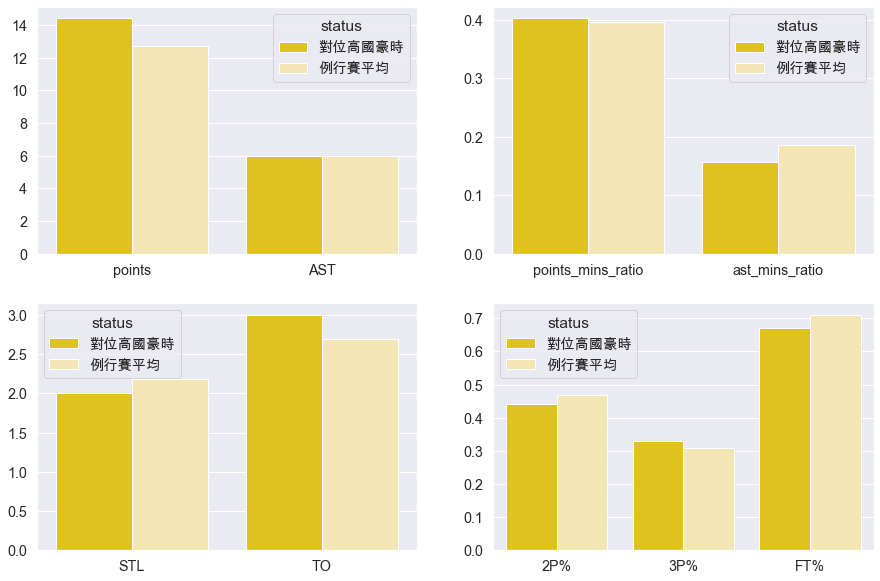

In [238]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
sns.barplot(data=kyle_when_vs_kao[kyle_when_vs_kao['stat_type'].isin(['points','AST'])], x='stat_type', y='value',hue='status',ax=ax[0][0],
            palette=status_color)
ax[0][0].set_xlabel('')
ax[0][0].set_ylabel('')

sns.barplot(data=kyle_when_vs_kao[kyle_when_vs_kao['stat_type'].isin(['points_mins_ratio','ast_mins_ratio'])], x='stat_type', y='value',hue='status',ax=ax[0][1],
            palette=status_color)
ax[0][1].set_xlabel('')
ax[0][1].set_ylabel('')

sns.barplot(data=kyle_when_vs_kao[kyle_when_vs_kao['stat_type'].isin(['2P%','3P%','FT%'])], x='stat_type', y='value',hue='status',ax=ax[1][1],
            palette=status_color)
ax[1][1].set_xlabel('')
ax[1][1].set_ylabel('')

sns.barplot(data=kyle_when_vs_kao[kyle_when_vs_kao['stat_type'].isin(['TO','STL'])], x='stat_type', y='value',hue='status',ax=ax[1][0],
            palette=status_color)
ax[1][0].set_xlabel('')
ax[1][0].set_ylabel('')


### 對位到李愷諺時高國豪的數據變化

In [250]:
status_color = {'對位李愷諺時':'blueviolet', '例行賽平均':'mediumpurple'}

In [251]:
lionerrs_table = player_ststistic_table.get_table(season='2021-22',game_type='例行賽',team='新竹街口攻城獅',stat_type='平均')
kao_regular_season_stat = lionerrs_table[lionerrs_table['player'] == '高國豪']
kao_regular_season_stat

,player,jersey,team,games,mins,2PM,2PA,2P%,3PM,3PA,...,FT%,points,REB_O,REB_D,REB,AST,STL,BLK,TO,PF
3,高國豪,4,新竹街口攻城獅,24,29:46,2.83,6.88,41.21%,1.5,4.13,...,76.09%,11.63,0.92,3.5,4.42,4.04,2.13,0.13,1.67,2.25


In [252]:
# convert types
    
kao_regular_season_stat['mins'] = kao_regular_season_stat['mins'].apply(parse_time)

for stat in ['mins','2PM','2PA','3PM','3PA','FTM','FTA','points','REB_O','REB_D','REB','AST','STL','BLK','TO','PF']:
    kao_regular_season_stat[stat] = kao_regular_season_stat[stat].astype('float')

for stat in ['2P%','3P%','FT%']:
    kao_regular_season_stat[stat] = kao_regular_season_stat[stat].apply(parse_percent)

kao_regular_season_stat['points_mins_ratio'] = kao_regular_season_stat.apply(points_mins_ratio, axis = 1)
kao_regular_season_stat['ast_mins_ratio'] = kao_regular_season_stat.apply(ast_mins_tario, axis = 1)
kao_regular_season_stat = kao_regular_season_stat.iloc[0]

/Users/whchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [253]:
kao_when_vs_kyle = average_stat[average_stat['player']=='高國豪'][['stat_type','value']]
kao_when_vs_kyle['status'] = '對位李愷諺時'

for stat_type in ['points','REB','AST','STL','TO','PF','mins','2P%','3P%','FT%','points_mins_ratio','ast_mins_ratio']:
    kao_when_vs_kyle = pd.concat([kao_when_vs_kyle, pd.DataFrame([[stat_type, kao_regular_season_stat[stat_type], '例行賽平均']], columns = kao_when_vs_kyle.columns)] )

Text(0, 0.5, '')

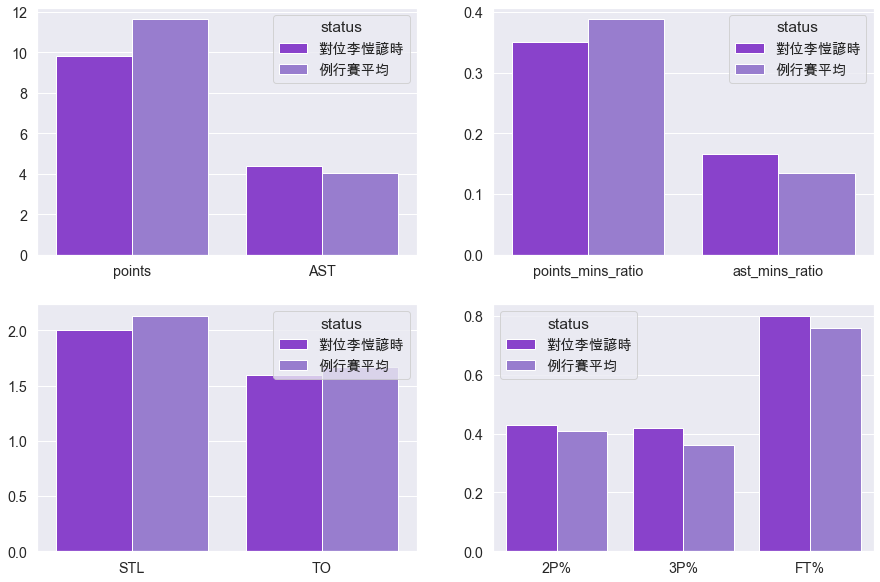

In [254]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
sns.barplot(data=kao_when_vs_kyle[kao_when_vs_kyle['stat_type'].isin(['points','AST'])], x='stat_type', y='value',hue='status',ax=ax[0][0],
            palette=status_color)
ax[0][0].set_xlabel('')
ax[0][0].set_ylabel('')

sns.barplot(data=kao_when_vs_kyle[kao_when_vs_kyle['stat_type'].isin(['points_mins_ratio','ast_mins_ratio'])], x='stat_type', y='value',hue='status',ax=ax[0][1],
            palette=status_color)
ax[0][1].set_xlabel('')
ax[0][1].set_ylabel('')

sns.barplot(data=kao_when_vs_kyle[kao_when_vs_kyle['stat_type'].isin(['2P%','3P%','FT%'])], x='stat_type', y='value',hue='status',ax=ax[1][1],
            palette=status_color)
ax[1][1].set_xlabel('')
ax[1][1].set_ylabel('')

sns.barplot(data=kao_when_vs_kyle[kao_when_vs_kyle['stat_type'].isin(['TO','STL'])], x='stat_type', y='value',hue='status',ax=ax[1][0],
            palette=status_color)
ax[1][0].set_xlabel('')
ax[1][0].set_ylabel('')
